# Accessing and Modifying Pixel Values

In [4]:
import numpy as np
import cv2 as cv

# Check if we can use optimized code
cv.setUseOptimized(True)

In [5]:
import os
img = cv.imread('roi.jpg') # Returns OpenCV matrix
assert img is not None, "file could not be read, check with os.path.exists()"

### Accessing the pixel values

In [6]:
px = img[100,100] # Access the individual pixel - > 3 channel (BGR)
print(px)

[57 63 68]


## Accessing only blue pixel

In [7]:
blue = img[100,100,2] # Use 0,1,2 for B,G,R
print(blue)

68


## Modify the pixel values 

In [8]:
img[100,100] = [255,255,255] # Provide values for each 
print(img[100,100]) # individual pixel 

[255 255 255]


## Accessing Image Properties

In [9]:
print(img.shape) # Returns - > Tuple(Rows, Column, Channels)
print(img.size) # Total pixels - > Row*Column*Channel
print(img.dtype) # Unsigned-8 bit is used to store the pixel values

(280, 450, 3)
378000
uint8


## Image Region of Interest 

Part of the Image that we are interested in.

In [10]:
ball = img[230:281, 275:320] # Accessing a rectangle from the image last index is omitted
# print(ball.shape) # Select ball
img[230:280, 280:325] = ball # Replace the ball in the image with the matching size of the ball (50,45)
cv.imshow("Image",img) # Very close to the second ball in the image
cv.waitKey(0)
cv.destroyAllWindows()

In [11]:
# Ball exactly at the top

ball = img[230:281, 275:320] # Accessing a rectangle from the image last index is omitted
print(ball.shape) # Select ball
img[0:50, 280:325] = ball # Replace the ball in the image with the matching size of the ball (50,45)
cv.imshow("Image",img) 
cv.waitKey(0)
cv.destroyAllWindows()

(50, 45, 3)


In [12]:
# Ball exactly at the top right

ball = img[230:281, 275:320] # Accessing a rectangle from the image last index is omitted
print(ball.shape) # Select ball
img[0:50, 405:] = ball # Replace the ball in the image with the matching size of the ball (50,45)
cv.imshow("Image",img)
cv.waitKey(0)
cv.destroyAllWindows()

(50, 45, 3)


## Splitting and Merging Image Channels

In [20]:
b,g,r = cv.split(img)
img = cv.merge((b,g,r))
cv.imshow("Hi",img)
cv.waitKey(0)
cv.destroyAllWindows()

## Making borders for Images

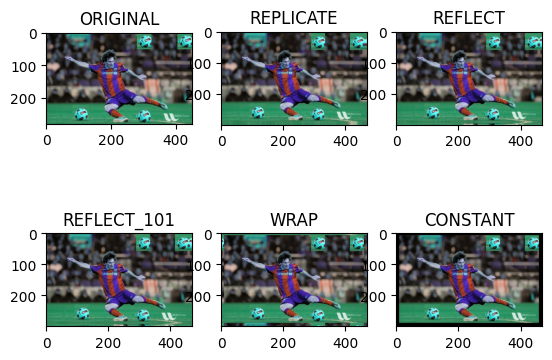

In [21]:
# Use cv.copyMakeBorder()

from matplotlib import pyplot as plt

replicate = cv.copyMakeBorder(img,10,10,10,10,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img,10,10,10,10,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img,10,10,10,10,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img,10,10,10,10,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img,10,10,10,10,cv.BORDER_CONSTANT,value=[0,0,0])

plt.subplot(231),plt.imshow(img,'gray'),plt.title('ORIGINAL') # 231: Means you're creating a subplot grid with 2 rows and 3 columns, and this plot will be the 1st subplot in that grid (row-major order).
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
 
plt.show()

cv.imshow("hi",img)
cv.waitKey(0)
cv.destroyAllWindows()